### 무게 찾기 --->  회귀
 - 목표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
 - 데이터셋 : fish.csv
 - 피쳐/속성 : Length
 - 타겟/라벨 : Weight

#### 1. 데이터 준비 및 치펴/ 타겟 분석

In [329]:
import pandas as pd
import matplotlib.pyplot as plt

In [330]:
DATA_file = '../data/fish.csv'

In [331]:
fishDF = pd.read_csv(DATA_file, usecols=['Weight','Length','Species'])
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [332]:
# oneDF으로 Perch만 골라서 저장
mask = (fishDF['Species'] == "Perch")
oneDF = fishDF[mask]
oneDF.reset_index(drop=True, inplace=True)
oneDF.index

RangeIndex(start=0, stop=56, step=1)

In [333]:
oneDF1 = oneDF.copy()

In [334]:
# 피쳐 분석  == >  상관계수값, 시각화 2가지 진행
oneDF1 = oneDF1[['Length','Weight']]
oneDF1.corr()

,Length,Weight
Length,1.000000,0.958656
Weight,0.958656,1.000000


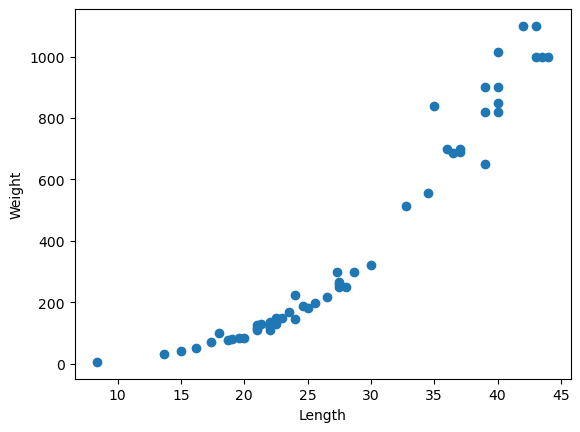

In [335]:
# 시각화
plt.scatter(oneDF['Length'], oneDF['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

##### 데이터를 분류를 하고 난 뒤에
#### 2. 학습 준비
 - 학습알고리즘 : KNN Regressor
 - 피쳐 스케일링
 - 학습용/테스트용 데이터셋 분리

In [336]:
# 피쳐와 레이블 타겟 분리
from sklearn.model_selection import train_test_split

In [337]:
# 피쳐/타켓 저장
features = oneDF[['Length']]
target = oneDF['Weight']
print(f'features: {features.shape}, {features.ndim}D')
print(f'target: {target.shape}, {target.ndim}D')

features: (56, 1), 2D
target: (56,), 1D


In [338]:
# 2-2 t학습용 테스트용 데이터 셋 분리
# - 전제 데이터 셋 ==> 학습용 테스트용 = 75:25(기본값), 'train_size ='로 변경가능
# - 회귀 데이터 셋 ==> 데이터 셋 구성 요소에 대한 비율은 고려 X
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=5)

In [339]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [340]:
print(f'x_train: {x_train.shape}, {x_train.ndim}D')
print(f'x_test: {x_test.shape}, {x_test.ndim}D')

print(f'y_train: {y_train.shape}, {y_train.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')


x_train: (42, 1), 2D
x_test: (14, 1), 2D
y_train: (42,), 1D
y_test: (14,), 1D


##### 2-3 스케일링 


In [341]:
from sklearn.preprocessing import MinMaxScaler

In [342]:
# 스캐일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [343]:
# 스케일러에 데이터셋 전용에 속성값 설정
mmScaler.fit(x_train)

MinMaxScaler()

In [344]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.23595506]), array([0.02808989]), array([8.4]), array([44.]))

In [345]:
# 학습용, 테스트를 데이터셋 스케일링 진행
x_train_scaler = mmScaler.transform(x_train)
x_test_scaler = mmScaler.transform(x_test)

In [346]:
# 참고 ----------------------------------------------------------
X = [[0], [1], [2], [3]] # 2D 
y = [0, 0, 1, 1] # 1D 

from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y) 

KNeighborsRegressor(n_neighbors=3)

In [347]:
print(neigh.predict([[1]])) # 예측값 추출

[0.33333333]


In [348]:
distance, index = neigh.kneighbors([[1.5]]) 
print(distance, index)

[[0.5 0.5 1.5]] [[1 2 0]]


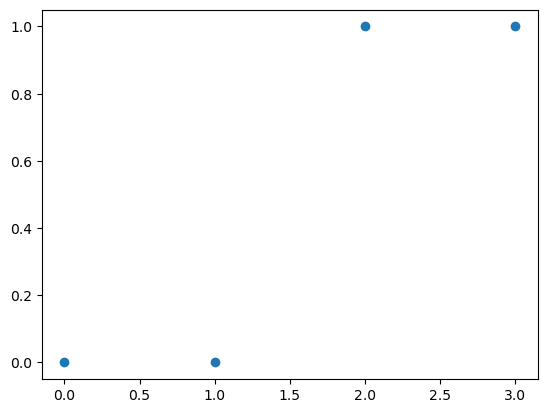

In [349]:
plt.scatter([0,1,2,3],[0,0,1,1])

In [350]:
#----------------------------------------------------------------------

In [351]:
# 3. 학습진행
# 모듈은 위에 로딩 완

# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(x_train_scaler, y_train) 

KNeighborsRegressor()

In [352]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_,model.effective_metric_params_

(1, 42, 'euclidean', {})

In [353]:
# 4. 최적의 K찾기

scores={}

for k in range (1, model.n_samples_fit_):
    # 최근접 이웃의 갯수 설정 <== 모델 성능 좌우 : 하이퍼파라미터
    model.n_neighbors =k

    # 성능 평가
    score = model. score(x_test_scaler, y_test)
    scores[k] = score

In [354]:
list(scores.keys())
list(scores.values())

[0.962307511806202,
 0.9538182257896977,
 0.9493036387523787,
 0.9523557854555492,
 0.9647151732715719,
 0.9760289799322864,
 0.984567767716345,
 0.9772215420053142,
 0.9740622246913221,
 0.9612025248327826,
 0.9613034376467838,
 0.9543510092502712,
 0.9453527109482712,
 0.9294273429257923,
 0.9093885979663016,
 0.8878023312723833,
 0.8643129069341208,
 0.8425006090786357,
 0.8154244070473367,
 0.7859453335314455,
 0.755277846975569,
 0.7243734923479366,
 0.6960978693908386,
 0.6633650962939346,
 0.6360095532889637,
 0.6048214110304534,
 0.5719645836159677,
 0.5430246734559279,
 0.5124324399258695,
 0.4817221451643916,
 0.44590728253446754,
 0.4141976914778335,
 0.38062660749381483,
 0.33982218387243135,
 0.3057310310809873,
 0.26234278381452636,
 0.22121621593322915,
 0.1776028815674785,
 0.12518328478471985,
 0.06973445493254427,
 0.014715887910179304]

In [355]:
# 최고 성능의 k값
best_k = sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]
    #                            x = (key, value)

best_k

7

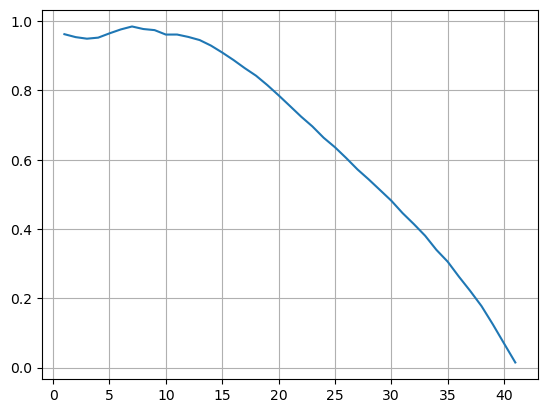

In [356]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show()

In [357]:
# 모델에 적용 = > n.neighbors에 설정
model.n_neighbors=best_k

#### 5. 새로운데이터의 무게 예측하기

In [358]:
new_length = input('농어 길이 : ')
print(f'new_length : {new_length}')

new_length : 44


In [359]:
# 2D DataFrame
dataDF = pd.DataFrame([[new_length]], columns=['Length'])
dataDF

,Length
0,44


In [360]:
# 스케일링 적용
data_scaled = mmScaler.transform(dataDF)

In [361]:
# 예측
model.predict(data_scaled)

array([967.14285714])

In [362]:
distance, index = model.kneighbors(data_scaled)
print(distance, index, sep='\n')

[[0.         0.01404494 0.02808989 0.05617978 0.11235955 0.11235955
  0.14044944]]
[[10  6 26 30 14 39 25]]


In [369]:
y_train[index.reshape(-1)].sum()/model.n_neighbors

967.1428571428571

##### KNN 단점

In [382]:
# 임의의 데이터
new_length = 4

In [383]:
# 2D DataFrame
dataDF = pd.DataFrame([[new_length]], columns=['Length'])


In [384]:
# 피쳐 스케일링
data_scaled = mmScaler.transform(dataDF)

In [385]:
# 예측
model.predict(data_scaled)

array([65.41428571])

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우  
 정확한 예측 불가